In [1]:
import os
import pickle
import textblob
import warnings
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from rich import print
import tensorflow as tf
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
warnings.simplefilter("ignore")
sns.set()

# 2-wheeler-EV-bikewale.csv

In [3]:

df5 = pd.read_csv("C:\\Users\\sp125\\OneDrive\\Desktop\\EV2__SHREYA_FINAL\\2-wheeler-EV-bikewale.csv")
df5.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [4]:
df5.isna().sum().sum()

3187

In [5]:
df5.review

0      We all checked the bike's capacity to be 150 k...
1      Performance is very poor on this bike. The cha...
2      I purchased this in April 2022 and the sales s...
3      If any issues come in scooty parts not availab...
4      Don't buy this vehicle unless you have a near ...
                             ...                        
839    Scooty is ok but 250 motor power is less. So t...
840    Superb scooty. good look, Many color options ....
841    Up to 2 years the condition was good,\nAfter 2...
842    Compare to other scooters it is a best bike, c...
843    This bike is good as this segment. can use the...
Name: review, Length: 844, dtype: object

In [6]:
def sentiment(text):
    if type(text) == str:
        blob = textblob.TextBlob(text)
        return blob.sentiment.polarity
    else: return 0

In [7]:
(df5.review.apply(sentiment)).mean()

0.17247112348469865

In [8]:
df5['sentiment'] = df5.review.apply(sentiment)

In [9]:
df5.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,0.131250
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,-0.192143
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,0.247727
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,0.080952
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,-0.093750


In [10]:
df5['Ridden for'] = df5['Ridden for'].replace({np.nan:0, '< 5000 kms':5000, '5000-10000 kms':7500, '> 15000 kms':15000,
       '10000-15000 kms':12500, 'Never owned':0})

In [11]:
df5 = df5.fillna(0)

In [12]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              844 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          844 non-null    int64  
 4   rating              844 non-null    int64  
 5   Visual Appeal       844 non-null    float64
 6   Reliability         844 non-null    float64
 7   Performance         844 non-null    float64
 8   Service Experience  844 non-null    float64
 9   Extra Features      844 non-null    float64
 10  Comfort             844 non-null    float64
 11  Maintenance cost    844 non-null    float64
 12  Value for Money     844 non-null    float64
 13  Model Name          844 non-null    object 
 14  sentiment           844 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 99.0+ KB

In [13]:
df5.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,TVS iQube,0.131250
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,5000,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,TVS iQube,-0.192143
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,5000,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,TVS iQube,0.247727
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,TVS iQube,0.080952
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,5000,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,TVS iQube,-0.093750


In [14]:
df5_numeric = df5.select_dtypes(['float', 'int'])
df5_numeric.head()

,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,0.131250
1,5000,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,-0.192143
2,5000,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,0.247727
3,7500,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.080952
4,5000,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,-0.093750


In [15]:
df5_numeric.shape

(844, 11)

In [16]:
pca3 = PCA(n_components=11)
df5_numeric_pca = pca3.fit_transform(df5_numeric)
df5_numeric_pca[:5]

array([[-5.09478640e+03,  1.57895971e+00, -2.37559663e+00,
         7.10846194e-01, -2.31221188e+00,  8.83832566e-01,
        -2.20355868e+00, -1.17549230e+00,  9.50159161e-01,
         1.24147132e+00,  2.63160832e-01],
       [-9.47862637e+01,  1.78523774e+00, -3.00159072e+00,
        -2.47016616e-01, -1.83166350e+00,  7.02699483e-01,
         5.99162224e-01, -6.99619389e-01, -6.44838195e-01,
         7.19584931e-02, -7.10246006e-02],
       [-9.47867780e+01, -1.66351102e+00, -2.20235883e+00,
         7.48821253e-01, -9.11920631e-01,  6.10591260e-01,
        -7.89786776e-01, -8.27536523e-01,  1.06030581e+00,
         1.02974941e+00,  1.39499095e-01],
       [ 2.40521381e+03,  3.89492985e+00, -1.73171211e+00,
         1.02746254e-01, -5.32441297e-01, -7.76133515e-01,
        -3.19208957e-01,  2.54534406e-02, -2.02738853e-01,
         6.85067022e-02,  1.84883008e-01],
       [-9.47864171e+01,  7.54018617e-01, -2.07147461e+00,
         7.76271792e-02, -2.01468037e+00,  3.41742471e-01,
  

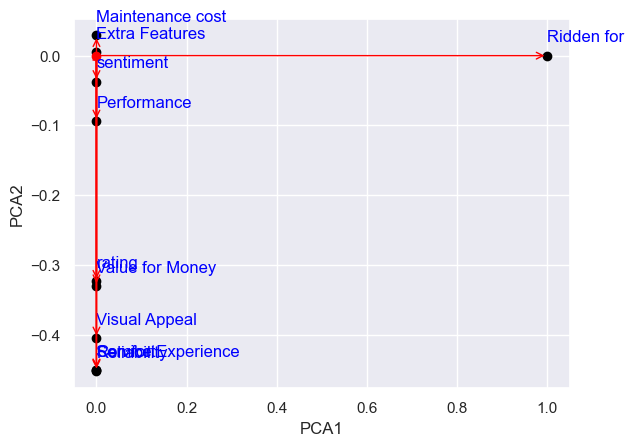

In [17]:
import matplotlib.pyplot as plt

pca = PCA(n_components=5)

# Assuming df5_numeric is your DataFrame with numerical columns
df5_numeric_pca = pca.fit_transform(df5_numeric)  # Fit and transform

def pca_plot(pca, df, x_axis=0, y_axis=1, scale=1):
    plt.scatter(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, color='black')
    for x, y, name in zip(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, df.columns):
        plt.text(x, y+0.02, name, color='blue')
        plt.annotate('', (x,y), (0,0), arrowprops=dict(arrowstyle='->', color='red'))
    plt.scatter(0, 0, c='red')
    plt.xlabel(f'PCA{x_axis+1}')
    plt.ylabel(f'PCA{y_axis+1}')
    plt.show()

pca_plot(pca, df5_numeric)  # Assuming df1_2 is your DataFrame


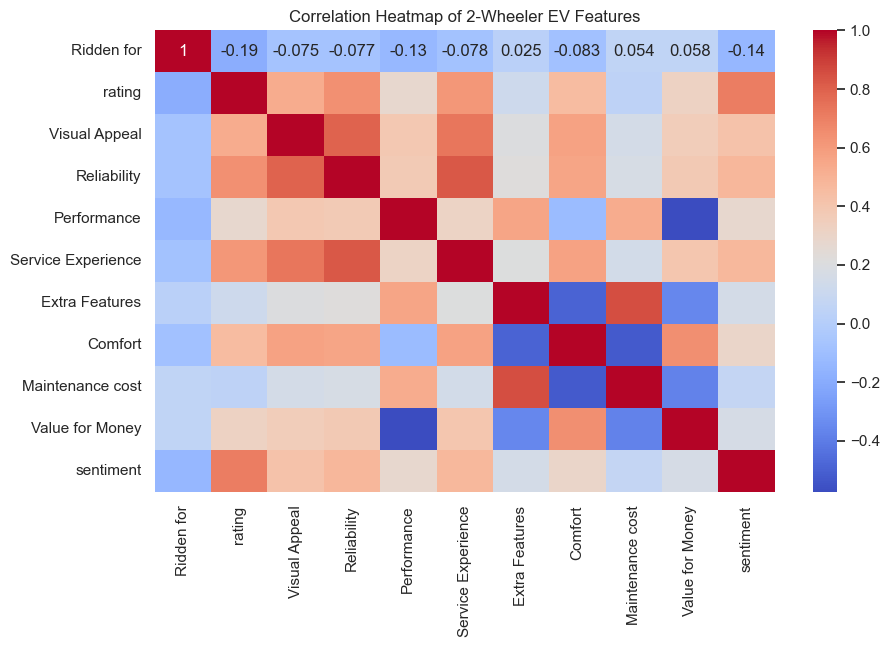

In [54]:
if df5_numeric.shape[1] > 1:  # Check for multiple numeric columns
    correlation_matrix = df5_numeric.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Adjust colormap as desired
    plt.title('Correlation Heatmap of 2-Wheeler EV Features')
    plt.show()


# CAR DETAILS FROM CAR DEKHO.csv

In [18]:
df6 = pd.read_csv("C:\\Users\\sp125\\OneDrive\\Desktop\\EV2__SHREYA_FINAL\\CAR DETAILS FROM CAR DEKHO.csv")
df6.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [19]:
df6.isna().sum().sum()

0

In [20]:
df6.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [21]:
df6_1 = df6[df6.fuel != 'Electric']

In [22]:
df6_1 = df6_1.select_dtypes(['float', 'int']).groupby('year').sum().reset_index()
df6_1.head()

,year,selling_price,km_driven
0,1992,50000,100000
1,1995,95000,100000
2,1996,450000,95000
3,1997,279000,270000
4,1998,2568000,775000


## Sentiment Distribution of Reviews (Bar Chart)

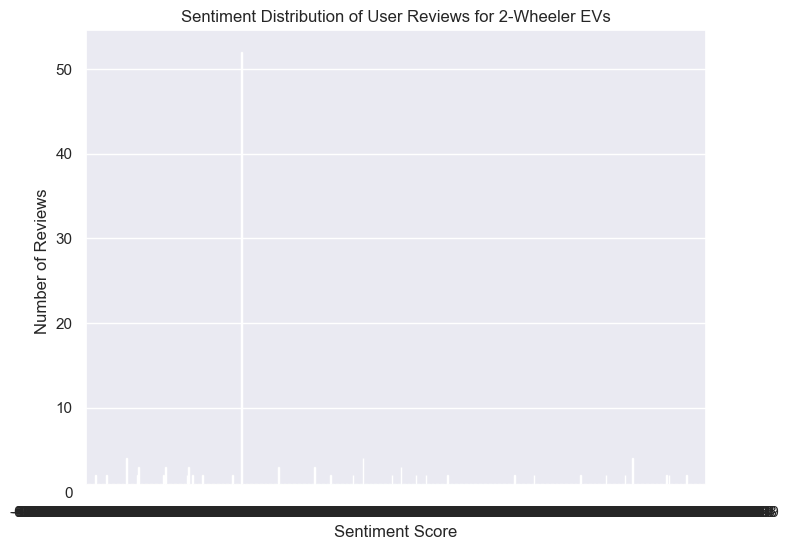

In [52]:
sentiment_counts = df5["sentiment"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution of User Reviews for 2-Wheeler EVs")
plt.xticks(rotation=0)  # Adjust x-axis tick labels for readability
plt.show()


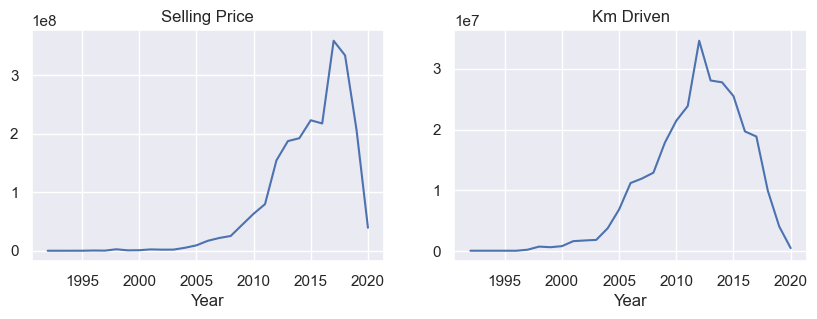

In [23]:
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].plot(df6_1.year, df6_1.selling_price)
axs[0].set_title('Selling Price')
axs[0].set_xlabel('Year')
axs[1].plot(df6_1.year, df6_1.km_driven)
axs[1].set_title('Km Driven')
axs[1].set_xlabel('Year')
plt.show()

In [24]:
df6_2 = df6[df6.fuel == 'Electric']
df6_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4145,Toyota Camry Hybrid,2006,310000,62000,Electric,Dealer,Automatic,Second Owner


In [25]:
df6.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [26]:
df6.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [27]:
df6.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

# Electric Car.csv

In [28]:
df7 = pd.read_csv("C:\\Users\\sp125\\OneDrive\\Desktop\\EV2__SHREYA_FINAL\\Electric Car.csv")
df7.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


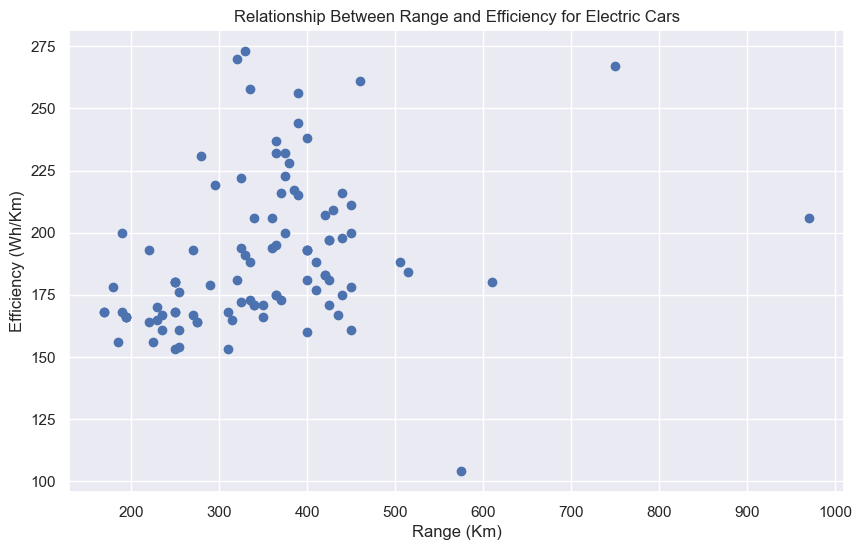

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df7["Range_Km"], df7["Efficiency_WhKm"])
plt.xlabel("Range (Km)")
plt.ylabel("Efficiency (Wh/Km)")
plt.title("Relationship Between Range and Efficiency for Electric Cars")
plt.show()


In [29]:
df7.isna().sum().sum()

0

In [30]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [31]:
df7 = df7[df7.FastCharge_KmH != '-']
df7.FastCharge_KmH = df7.FastCharge_KmH.astype(int)

In [32]:
df7_1 = df7.select_dtypes(['float', 'int'])
df7_1.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,4.6,233,450,161,940,5,55480
1,10.0,160,270,167,250,5,30000
2,4.7,210,400,181,620,5,56440
3,6.8,180,360,206,560,5,68040
4,9.5,145,170,168,190,4,32997


In [33]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x, y = scaler_x.fit_transform(df7_1.drop('PriceEuro', axis=1)), scaler_y.fit_transform(df7_1.PriceEuro.values.reshape(-1, 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

for i in [x_train, x_test, y_train, y_test]:
    print(i.shape)

(78, 6)

(20, 6)

(78, 1)

(20, 1)

In [34]:
Lr = LinearRegression()
Lr.fit(x_train, y_train)
Lr.score(x_train, y_train)

0.7714756606431553

In [35]:
Lr.score(x_test, y_test)

0.4627381577569435

In [36]:
Dt = DecisionTreeRegressor()
Dt.fit(x_train, y_train)
Dt.score(x_train, y_train)

0.9998444885627737

In [37]:
Dt.score(x_test, y_test)

0.7209725402972911

In [38]:
svr = SVR()
svr.fit(x_train, y_train)
print(svr.score(x_train, y_train))
print(svr.score(x_test, y_test))

0.8138103675047363

0.7462464045069446

In [39]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9578217766644619

0.6603809367262166

In [40]:
model = Sequential([
    Dense(4, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 1.3587
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.0000e+00 - loss: 1.4798
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 1.4986  
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.2831 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 1.2389 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 1.3889  
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 1.2340  
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 1.4813  
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 1.3095  
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 1.2186  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.0000e+00 - loss: 1.1006


[1.100577712059021, 0.0]

> SVR gives very good score

In [42]:
df7_1.columns

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'PriceEuro'],
      dtype='object')

## Box Plot of Fast Charging Speed for Electric Cars:

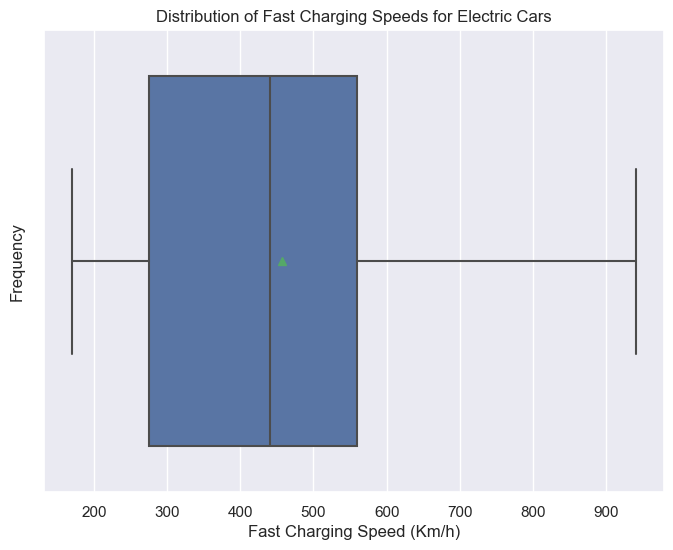

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="FastCharge_KmH",
    showmeans=True,  # Display mean markers
    data=df7
)
plt.xlabel("Fast Charging Speed (Km/h)")
plt.ylabel("Frequency")
plt.title("Distribution of Fast Charging Speeds for Electric Cars")
plt.show()


## Time Series Plot of Selling Price vs. Year (for Non-Electric Cars):

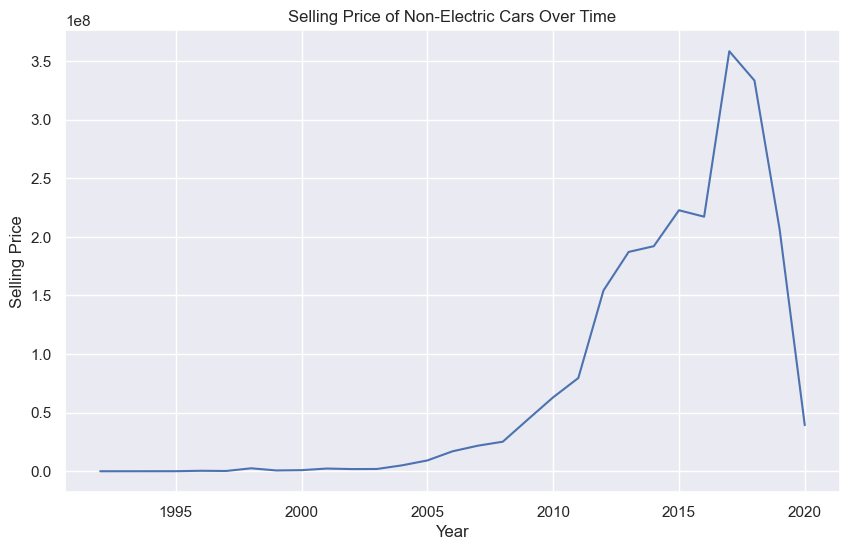

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(df6_1["year"], df6_1["selling_price"])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Selling Price of Non-Electric Cars Over Time")
plt.show()


## Car Price prediction model

In [43]:
import pickle

# Define absolute paths to your pickle files
car_model_path = "C:\\Users\\sp125\\OneDrive\\Desktop\\EV2__SHREYA_FINAL\\car_model.pkl"
scaler_x_path = "C:\\Users\\sp125\\OneDrive\\Desktop\\EV2__SHREYA_FINAL\\scaler_x.pkl"
scaler_y_path = "C:\\Users\\sp125\\OneDrive\\Desktop\\EV2__SHREYA_FINAL\\scaler_y.pkl"

# Load the model and scalers
try:
  with open(car_model_path, 'rb') as f:
    car_model = pickle.load(f)

  with open(scaler_x_path, 'rb') as f:
    scaler_x = pickle.load(f)

  with open(scaler_y_path, 'rb') as f:
    scaler_y = pickle.load(f)

  # Rest of your code using car_model, scaler_x, and scaler_y
except FileNotFoundError as e:
  print(f"Error: Files not found. Please check the paths. ({e})")

def car_price(AccelSec, TopSpeed_KmH, Range_Km, 
              Efficiency_WhKm, FastCharge_KmH, Seats):
  """This function gets AccelSec, TopSpeed_KmH, Range_Km, Efficiency_WhKm,
  FastCharge_KmH and Seats of car. It returns price of car in rupees"""
  x = scaler_x.transform([[AccelSec, TopSpeed_KmH, Range_Km, 
                            Efficiency_WhKm, FastCharge_KmH, Seats]])
  y = car_model.predict(x)
  y = scaler_y.inverse_transform(y.reshape(1, -1))
  return y[0][0] * 88.8  # Assuming 88.8 represents a conversion factor

# Example usage (assuming you have data for the car)
car_data = [5, 200, 300, 150, 80, 5]  # Replace with your actual data
predicted_price = car_price(*car_data)
print("Predicted Price:", predicted_price)


Predicted Price: 4969407.289995525

In [44]:
sample = df7_1.iloc[0].tolist() # sample data
print(sample)
price = car_price(*sample[:-1]) # we should get near 55480.0
print(f'Price = €{round(price/88.8):,} and ₹{round(price):,}')

[4.6, 233.0, 450.0, 161.0, 940.0, 5.0, 55480.0]

Price = €57,004 and ₹5,061,992

In [45]:
sample = df7_1.iloc[1].tolist() # sample data
print(sample)
price = car_price(*sample[:-1]) # we should get near 30000.0
print(f'Price = €{round(price/88.8):,} and ₹{round(price):,}')

[10.0, 160.0, 270.0, 167.0, 250.0, 5.0, 30000.0]

Price = €32,642 and ₹2,898,624

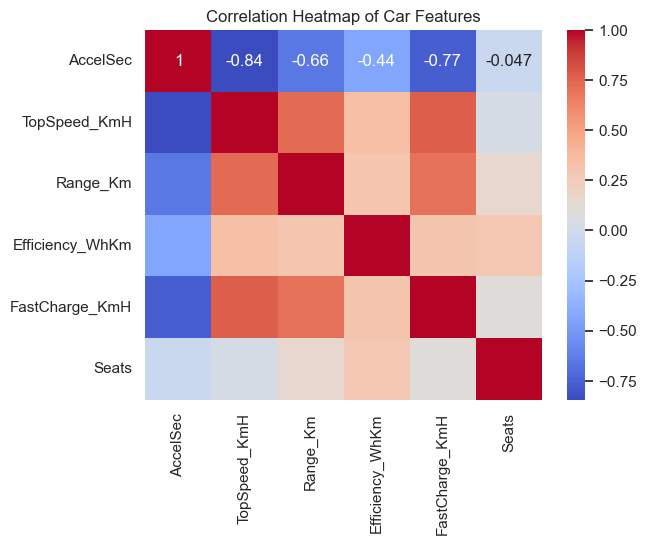

In [46]:
# Assuming you have numerical features for correlation analysis
correlation_matrix = df7_1.iloc[:, :-1].corr()  # Exclude price column

# Create heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Car Features')
plt.show()


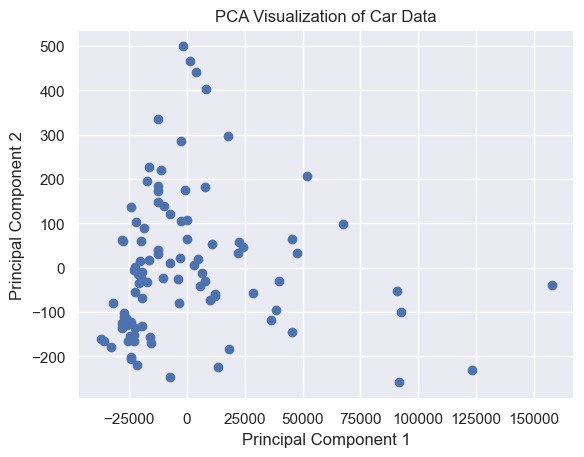

In [49]:
# Perform PCA with desired number of components (e.g., 2)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df7_1)

# Visualize data points in principal components space
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Car Data')
plt.show()
